## Let's solve a classification problem on kaggle 

**problem :** [StumbleUpon Evergreen Classification Challenge]("https://www.kaggle.com/c/stumbleupon/overview")

## Import Libraries :

In [366]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns
import re
from urllib.parse import urlparse

## Data Loading : 

In [367]:
data = pd.read_csv('train.tsv',sep='\t')
data.sample(2).T

,2817,4433
url,http://www.cbsnews.com/8301-505404_162-5743552...,http://allrecipes.com/recipe/pudding-shots/
urlid,3841,7739
boilerplate,"{""title"":""Apple tart Make yours as pretty as a...","{""url"":""allrecipes recipe pudding shots"",""titl..."
alchemy_category,arts_entertainment,gaming
alchemy_category_score,0.716401,0.481327
avglinksize,2.372294,1.622137
commonlinkratio_1,0.427451,0.350725
commonlinkratio_2,0.2,0.144928
commonlinkratio_3,0.078431,0.034783
commonlinkratio_4,0.047059,0.014493


## Data Exploration and cleaning :

In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

### Column Summary :

In [369]:
def print_column_summay(data):
    n , _ = data.shape
    name = []
    dtype = []
    unique_values_conut = []
    missing_value = []
    for column in data.columns:
        # print(column) 
        name.append(column)
        # print(str(data[column].dtype))
        data_type = str(data[column].dtype)
        dtype.append(str(data[column].dtype))
        if(data_type=="float64"):
            unique_values_conut.append("")
        else:
            unique_values_conut.append(str(data[column].nunique()))  
        missing_value.append(f" {round(data[column].isnull().sum() / n,2)*100} %")
    
    summary = {
        "Name":name,
        "Type":dtype,
        "Unique Values count":unique_values_conut,
        "Missing Values":missing_value
    }
    summary_table = pd.DataFrame(summary)
    return summary_table

print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,url,object,7395,0.0 %
1,urlid,int64,7395,0.0 %
2,boilerplate,object,7394,0.0 %
3,alchemy_category,object,14,0.0 %
4,alchemy_category_score,object,4806,0.0 %
5,avglinksize,float64,,0.0 %
6,commonlinkratio_1,float64,,0.0 %
7,commonlinkratio_2,float64,,0.0 %
8,commonlinkratio_3,float64,,0.0 %
9,commonlinkratio_4,float64,,0.0 %


### Duplicated Values :

In [370]:
print("Number of Duplicated Values : ",data.duplicated().sum())

Number of Duplicated Values :  0


## Feature Engineering and EDA

### **URL**

In [371]:
indexs = np.random.randint(0,375,10)
for i in indexs:
    print(i , data.iloc[i].url)

# web site , domaine (.com , .uk , .fr) using regex :

246 http://www.picsroll.com/2011/01/real-face-of-fast-food-burgers.html
345 http://healthland.time.com/2011/01/12/study-can-a-veggie-rich-diet-make-you-more-beautiful/
108 http://southernfood.about.com/od/cakespiesdesserts/r/bl30418d.htm
373 http://www.jsayers.com/thingpart/thingpart4.html
40 http://www.second-opinions.co.uk/bottle.html
368 http://www.pbs.org/everydayfood/recipes/chicken_with_artichokes.html
353 http://www.elnorte.com/
134 http://www.insidershealth.com/glossary/definition/acne_vulgaris/1032
113 http://gracessweetlife.com/2010/09/sugared-chocolate-spiced-muffins-and-sugar-donut-muffins/
314 http://blogs.babble.com/family-kitchen/2011/12/09/oh-fudge-8-awesome-fudge-recipes?pid=7555


In [372]:
def get_WebsiteName_Domaine(url,wich="w"):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    site_name = domain.replace("www.", "").split('.')[0]
    patter_domaine = r'\.[a-z]+(?=\/|$)'
    match_domaine = re.search(patter_domaine,url)
    if site_name and wich=="w":
        return site_name
    elif match_domaine and wich=="d":
        return match_domaine.group(0)

data["web site"] = data['url'].apply(get_WebsiteName_Domaine)
data["domaine"] = data['url'].apply(get_WebsiteName_Domaine,wich="d")


In [373]:
data["domaine"].value_counts()[:10].to_frame().style.background_gradient()

,count
domaine,
.com,6298
.net,301
.uk,265
.org,244
.ca,45
.au,39
.info,34
.edu,17
.de,16


In [374]:
data["web site"].value_counts()[:10].to_frame().style.background_gradient()

,count
web site,
insidershealth,143
sportsillustrated,109
huffingtonpost,99
allrecipes,96
bleacherreport,86
blogs,85
youtube,85
ivillage,59
foodnetwork,57


In [375]:
print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,url,object,7395,0.0 %
1,urlid,int64,7395,0.0 %
2,boilerplate,object,7394,0.0 %
3,alchemy_category,object,14,0.0 %
4,alchemy_category_score,object,4806,0.0 %
5,avglinksize,float64,,0.0 %
6,commonlinkratio_1,float64,,0.0 %
7,commonlinkratio_2,float64,,0.0 %
8,commonlinkratio_3,float64,,0.0 %
9,commonlinkratio_4,float64,,0.0 %


In [376]:
data_filtered = data.loc[:,['url','web site','domaine']]
data_filtered.sample(12).T 

,1018,5115,4497,3848,5266,1807,2937,4184,4071,3740,4822,2785
url,http://www.itsnicethat.com/index.php?id=2033,http://www.foxnews.com/health/2012/01/19/diagn...,http://www.huffingtonpost.com/elie-ayrouth/pro...,http://www.engadget.com/2010/08/07/san-francis...,http://www.cracked.com/article_18867_5-creepy-...,http://camerafilmroll.blogg.se/,http://www.womansday.com/_mobile,http://itechfuture.com/concept-future-computer...,http://www.watchonepiecepoint.com/2011/09/comb...,http://www.sharonblog.com/reeses-cheesecake-re...,http://www.angiplast.com/sitemap.htm,http://gimmesomeoven.com/pork-tenderloin-with-...
web site,itsnicethat,foxnews,huffingtonpost,engadget,cracked,camerafilmroll,womansday,itechfuture,watchonepiecepoint,sharonblog,angiplast,gimmesomeoven
domaine,.com,.com,.com,.com,.com,.se,.com,.com,.com,.com,.com,.com


### **urlid :**

In [377]:
droped_columns = []
droped_columns.append('urlid')

### **boilerplate :**

In [378]:
indexs = np.random.randint(0,375,10)
for i in indexs:
    print(i , data.iloc[i].boilerplate)


84 {"title":"The Favre Supremacy ","body":"March 4th Moments Later March 6th March 18th April 10th April 23rd May 1st May 15th June 8th June 22nd July 19th July 31st August 3rd Dennis Corin Tucker s Stalker Farrell This Week on Something Awful ","url":"somethingawful d news favre packers espn php"}
349 {"url":"cool been 2012 03 apple new ipad vs the rest","title":"Cool Been ","body":"When Steve Jobs launched the first iPad in 2010 he did so against a backdrop of uncertainty Its arrival came with the typical predictable fanfare Apple devotees queued around the block to get their hands on it while technology blogs and news websites including this one prodded excitedly at it Is this the future of computing everyone wondered Back then nobody really knew the answer It was a mood best summed up by a simple remark from BBC website reader Ian Mears I must admit I want one he wrote But I don t know what I d actually do with it Yet the numbers do not lie Two years and over 50 million units later

In [379]:
import json
def extract_title_body_lenght(data):
    boilerplatedf = data["boilerplate"].apply(json.loads)
    boilerplatedf = pd.DataFrame(boilerplatedf.tolist())
    data['boilerplate title'] = boilerplatedf['title']
    data['boilerplate body'] = boilerplatedf['body']
    data['boilerplate title'] = data['boilerplate title'].fillna('')
    data['boilerplate body'] = data['boilerplate body'].fillna('')
    data['boilerplate title lenght'] = data["boilerplate title"].apply(lambda x : len(x))
    data['boilerplate body lenght'] = data["boilerplate body"].apply(lambda x : len(x))
    del boilerplatedf
    return data

In [380]:
data = extract_title_body_lenght(data)
data.sample(2).T

,6685,1825
url,http://www.forbes.com/sites/ericjackson/2011/0...,http://www.beyondweird.com/survival/srvival.html
urlid,8109,4241
boilerplate,"{""title"":""The Top Ten Lessons Steve Jobs Can T...","{""title"":""SURVIVAL LIST "",""body"":""SURVIVAL LIS..."
alchemy_category,arts_entertainment,?
alchemy_category_score,0.674122,?
avglinksize,2.126531,0.0
commonlinkratio_1,0.553265,0.0
commonlinkratio_2,0.223368,0.0
commonlinkratio_3,0.085911,0.0
commonlinkratio_4,0.044674,0.0


<Axes: title={'center': 'Average Boilerplate title Length of Evergreen vs Non Evergreen Label'}, ylabel='label'>

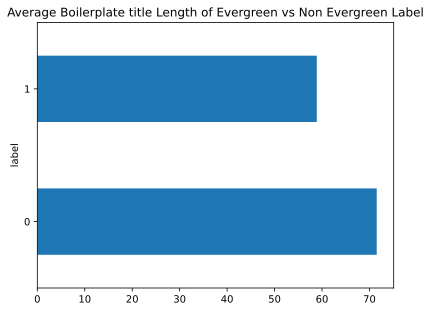

In [381]:
data.groupby("label")["boilerplate title lenght"].mean().plot(kind='barh',title="Average Boilerplate title Length of Evergreen vs Non Evergreen Label")

<Axes: title={'center': 'Average Boilerplate body Length of Evergreen vs Non Evergreen'}, ylabel='label'>

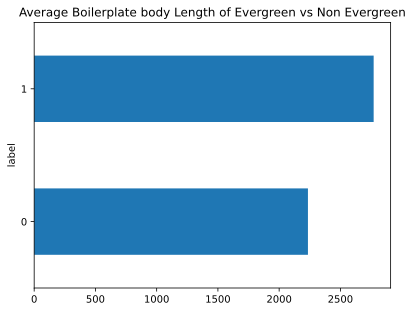

In [382]:
data.groupby("label")["boilerplate body lenght"].mean().plot(kind='barh',title="Average Boilerplate body Length of Evergreen vs Non Evergreen")

### **alchemy category**:

In [383]:
data['alchemy_category'].value_counts().to_frame().style.background_gradient()

,count
alchemy_category,
?,2342
recreation,1229
arts_entertainment,941
business,880
health,506
sports,380
culture_politics,343
computer_internet,296
science_technology,289


In [384]:
data.groupby("alchemy_category")["label"].mean().sort_values().to_frame().style.background_gradient()

,label
alchemy_category,
weather,0.000000
sports,0.205263
computer_internet,0.246622
unknown,0.333333
gaming,0.368421
arts_entertainment,0.371945
religion,0.416667
law_crime,0.419355
science_technology,0.456747


In [385]:
data.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)

,mean,count
alchemy_category,,
?,0.502135,2342
recreation,0.684296,1229
arts_entertainment,0.371945,941
business,0.711364,880
health,0.573123,506
sports,0.205263,380
culture_politics,0.457726,343
computer_internet,0.246622,296
science_technology,0.456747,289


### **alchemy category score** : 

In [386]:
droped_columns.append('alchemy_category_score')

### **is news:**

In [387]:
data['is_news'].value_counts().to_frame()
data['is_news'] = data['is_news'].str.replace("?","0").astype(int)

In [388]:
data['is_news'].value_counts().to_frame()

,count
is_news,
1,4552
0,2843


### **news_front_page:**

In [389]:
data['news_front_page'].value_counts()
data['news_front_page'] = data['news_front_page'].str.replace("?","0").astype(int)

In [390]:
data['news_front_page'].value_counts().to_frame()

,count
news_front_page,
0,7101
1,294


In [391]:
droped_columns.extend(['boilerplate','url','boilerplate body','web site','boilerplate title','domaine'])

In [392]:
data.drop(columns=droped_columns,inplace=True)

In [393]:
print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,alchemy_category,object,14,0.0 %
1,avglinksize,float64,,0.0 %
2,commonlinkratio_1,float64,,0.0 %
3,commonlinkratio_2,float64,,0.0 %
4,commonlinkratio_3,float64,,0.0 %
5,commonlinkratio_4,float64,,0.0 %
6,compression_ratio,float64,,0.0 %
7,embed_ratio,float64,,0.0 %
8,framebased,int64,1,0.0 %
9,frameTagRatio,float64,,0.0 %


In [394]:
numeric_data = data.select_dtypes(include=["number"])

numeric_data.corr()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,boilerplate title lenght,boilerplate body lenght
avglinksize,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,NaN,-0.049270,-0.002046,...,0.122550,-0.015670,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172,-0.019468,0.016601
commonlinkratio_1,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,NaN,-0.294860,0.006790,...,0.257200,0.026324,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364,0.036185,0.117733
commonlinkratio_2,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,NaN,-0.259222,0.000263,...,0.257594,0.047111,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488,0.007181,0.124200
commonlinkratio_3,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,NaN,-0.218559,-0.031097,...,0.109654,0.040057,0.264022,0.283924,0.049203,-0.008652,-0.008599,0.105964,-0.044878,0.136849
commonlinkratio_4,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,NaN,-0.178064,-0.052519,...,0.059223,0.041393,0.162883,0.233898,0.026384,0.036387,-0.013507,0.080464,-0.038163,0.116602
compression_ratio,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,NaN,0.159335,0.027657,...,0.146470,-0.014765,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.059737,-0.318022,-0.244643
embed_ratio,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,NaN,-0.130753,-0.026473,...,-0.108476,0.008855,0.046484,0.042942,0.043343,0.037361,-0.342206,0.039536,0.292144,0.230184
framebased,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frameTagRatio,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,NaN,1.000000,0.010193,...,0.158874,-0.085953,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.187762,0.025708,-0.190246
hasDomainLink,-0.002046,0.006790,0.000263,-0.031097,-0.052519,0.027657,-0.026473,NaN,0.010193,1.000000,...,0.022583,-0.025167,-0.017361,0.013678,0.058085,0.051330,0.008718,-0.004863,0.007011,-0.019640


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation (Colonnes Numériques)")
plt.show()

In [ ]:
object_data = data.select_dtypes(include=["object"])
object_dummies = pd.get_dummies(object_data, drop_first=True).astype(int)
final_data = pd.concat([numeric_data, object_dummies], axis=1)

final_data.head()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,...,0,0,0,0,0,0,0,0,0,0
1,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,...,0,0,0,0,1,0,0,0,0,0
2,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,...,0,0,1,0,0,0,0,0,0,0
3,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,...,0,0,1,0,0,0,0,0,0,0
4,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,...,0,0,0,0,0,0,0,1,0,0


## Modeling : 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ,LogisticRegressionCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,accuracy_score

In [ ]:
X = final_data.drop(columns=['label'])
y = final_data['label']



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train , X_test , y_train ,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model = LogisticRegression(solver='lbfgs', random_state=42)

model.fit(X_train,y_train)


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       730
           1       0.66      0.71      0.68       749

    accuracy                           0.66      1479
   macro avg       0.67      0.66      0.66      1479
weighted avg       0.67      0.66      0.66      1479



In [ ]:
data_test = pd.read_csv('test.tsv',sep='\t')
data_test["web site"] = data_test['url'].apply(get_WebsiteName_Domaine)
data_test["domaine"] = data_test['url'].apply(get_WebsiteName_Domaine,wich="d")
data_test['is_news'] = data_test['is_news'].str.replace("?","0").astype(int)
data_test['news_front_page'] = data_test['news_front_page'].str.replace("?","0").astype(int)
data_test = extract_title_body_lenght(data_test)

droped_columns.pop(0)
data_test.drop(columns=droped_columns,inplace=True)
print_column_summay(data_test)

,Name,Type,Unique Values count,Missing Values
0,urlid,int64,3171,0.0 %
1,alchemy_category,object,12,0.0 %
2,avglinksize,float64,,0.0 %
3,commonlinkratio_1,float64,,0.0 %
4,commonlinkratio_2,float64,,0.0 %
5,commonlinkratio_3,float64,,0.0 %
6,commonlinkratio_4,float64,,0.0 %
7,compression_ratio,float64,,0.0 %
8,embed_ratio,float64,,0.0 %
9,framebased,int64,1,0.0 %


In [ ]:
numeric_data = data_test.select_dtypes(include=["number"])
object_data = data_test.select_dtypes(include=["object"])
object_dummies = pd.get_dummies(object_data, drop_first=True).astype(int)
final_test = pd.concat([numeric_data, object_dummies], axis=1)
print(final_test.columns.to_list())
print(final_data.columns.to_list())
final_ft = final_test[final_test.drop('urlid', axis=1).columns]


['urlid', 'avglinksize', 'commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio', 'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news', 'lengthyLinkDomain', 'linkwordscore', 'news_front_page', 'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio', 'spelling_errors_ratio', 'boilerplate title lenght', 'boilerplate body lenght', 'alchemy_category_arts_entertainment', 'alchemy_category_business', 'alchemy_category_computer_internet', 'alchemy_category_culture_politics', 'alchemy_category_gaming', 'alchemy_category_health', 'alchemy_category_law_crime', 'alchemy_category_recreation', 'alchemy_category_religion', 'alchemy_category_science_technology', 'alchemy_category_sports']
['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio', 'hasDomainLink'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sub_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]), 
    Dropout(0.5),  #
    Dense(64, activation='relu', input_dim=X_train.shape[1]), 
    Dropout(0.5),  #
    Dense(32, activation='relu'),  
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])


sub_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = sub_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/150


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5195 - loss: 1.7364 - val_accuracy: 0.5650 - val_loss: 1.3561
Epoch 2/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5482 - loss: 1.2902 - val_accuracy: 0.5693 - val_loss: 1.0918
Epoch 3/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5754 - loss: 1.0436 - val_accuracy: 0.6216 - val_loss: 0.9182
Epoch 4/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5899 - loss: 0.8866 - val_accuracy: 0.6706 - val_loss: 0.7955
Epoch 5/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6406 - loss: 0.7862 - val_accuracy: 0.6959 - val_loss: 0.7189
Epoch 6/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6558 - loss: 0.7264 - val_accuracy: 0.6900 - val_loss: 0.6814
Epoch 7/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6741 - loss: 0.6842 - val_accuracy: 0.6926 - val_loss: 0.6650
Epoch 8/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6735 - loss: 0.6712 - val_accuracy: 0.6858

In [ ]:
loss, accuracy = sub_model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy sur le jeu de test : {accuracy:.2f}")

Accuracy sur le jeu de test : 0.68


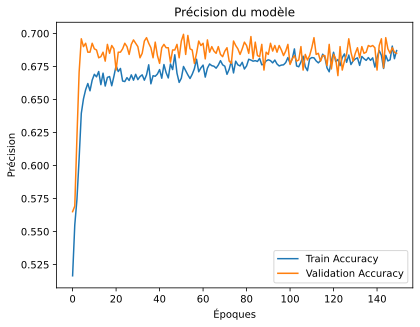

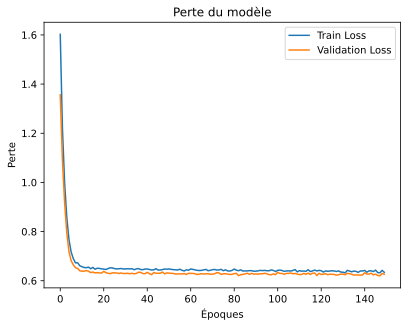

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

# Tracer la perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perte du modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

In [ ]:
final_ft_aligned = final_ft.reindex(columns=X.columns, fill_value=0)
predictions = (sub_model.predict(final_ft_aligned) > 0.5).astype(int).flatten()
predictions


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
sub_df = pd.DataFrame({'urlid' : final_test.urlid, 'label': predictions})
sub_df.head()

,urlid,label
0,5865,0
1,782,0
2,6962,0
3,7640,0
4,3589,0


In [ ]:
sub_df.to_csv("Submission.csv",index=False)